In [2]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import pandas as pd
from matplotlib import colors
from autograd import grad 
from autograd import hessian
readDataPath = './readData/'

In [3]:
def generate_colored_nongaussian_data(means, lambdas, thetas, Ns, distribution='normal', quiet_mode='true'):
    """
    means: shape (2, 2), means[0] is the 2 x 1 mean vector for class 1 data generation
    lambdas: shape (2, 2), lambdas[0] are the 2 eigenvalues of the covariance matrix for generatinge data for class 1
    Ns: [N1, N2] the number of samples to be generated for each of teh two classes.
    distribution: in {normal, exponential, uniform} sets the distribution to generate data for both classes.
    quiet_mode: added this so that it won't print the details unless quiet_mode == False
    """
    N1 = Ns[0]
    N2 =  Ns[1]
    N = N1 + N2
    x = np.zeros((N, 2))
    assert distribution in {'normal', 'exponential', 'uniform'}, f'The {distribution} is not supported, only normal, exponential, uniform distributions are supported.'
    assert np.min(lambdas) > 0, f'lambda all have to be > 0 as they are variaces of the random vector projected onto the eigen-vectors.  You passed lambdas = {lambdas}'
    if distribution == 'normal':
        x[:N1] = np.random.normal(0, 1, (N1, 2))
        x[N1:] = np.random.normal(0, 1, (N2, 2))
    elif distribution == 'exponential':
        ## np.random.exponential(1) generates realizations from a unit variance, mean 1
        x[:N1] = np.random.exponential(1, (N1, 2)) - 1
        x[N1:] = np.random.exponential(1, (N2, 2)) - 1
    elif distribution == 'uniform':
        ## variance of uniform on (a,b) is (b-a)^2 / 12
        a = np.sqrt(3)
        x[:N1] = np.random.uniform(-a, a, (N1, 2))
        x[N1:] = np.random.uniform(-a, a, (N1, 2))

    def compute_coloring_matrix(theta, lams):
        E = np.asarray([ [np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)] ])
        Lambda_root = np.sqrt( np.asarray([ [lams[0], 0], [0, lams[1]] ]) )
        H = E @ Lambda_root
        K = H @ H.T
        return H, K

    H1, K1 = compute_coloring_matrix(thetas[0], lambdas[0])
    H2, K2 = compute_coloring_matrix(thetas[1], lambdas[1])

    x[:N1] = x[:N1] @ H1.T + means[0]
    x[N1:] = x[N1:] @ H2.T + means[1]

    labels = np.ones(N)
    labels[N1:] += 1

    sample_means = np.zeros((2,2))
    sample_means[0] = np.mean(x[:N1], axis=0)
    sample_means[1] = np.mean(x[N1:], axis=0)

    if not quiet_mode:
        print(f'Data generated under the {distribution} distribution')
        Ks = [K1, K2]
        Hs = [H1, H2]

        for i in range(2):
            print(f'The mean in the generating pdf for class {i + 1} is: {means[i]}')
            print(f'The sample mean for class {i + 1}  data is: {sample_means[i]}\n')

            print(f'The coloring matrix class {i + 1}  data is:\n {Hs[i]}')
            print(f'The covariance matrix class {i + 1}  data is:\n {Ks[i]}\n\n')

    return x, labels, sample_means

Data generated under the normal distribution
The mean in the generating pdf for class 1 is: [-1.  1.]
The sample mean for class 1  data is: [-1.05232465  0.88621633]

The coloring matrix class 1  data is:
 [[ 0.70710678 -0.2236068 ]
 [ 0.70710678  0.2236068 ]]
The covariance matrix class 1  data is:
 [[0.55 0.45]
 [0.45 0.55]]


The mean in the generating pdf for class 2 is: [ 1. -1.]
The sample mean for class 2  data is: [ 0.89370036 -0.86557011]

The coloring matrix class 2  data is:
 [[ 0.2236068  -0.70710678]
 [ 0.2236068   0.70710678]]
The covariance matrix class 2  data is:
 [[ 0.55 -0.45]
 [-0.45  0.55]]




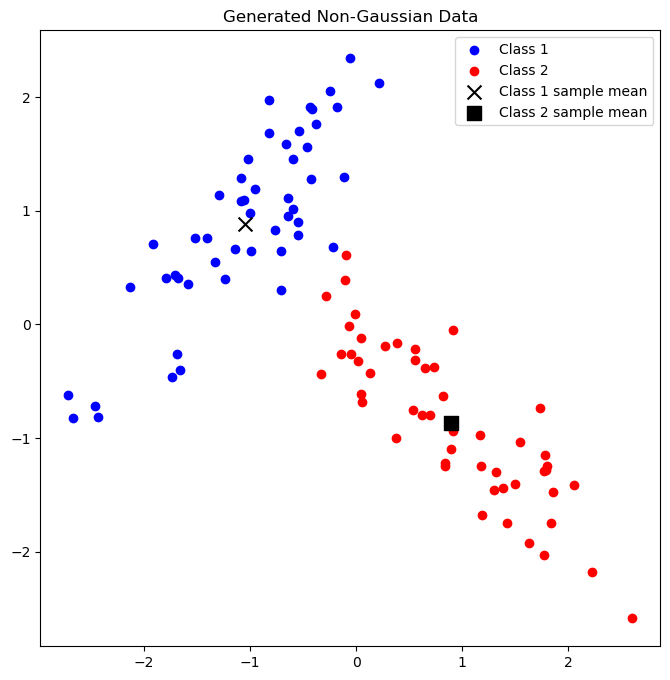

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Define the means, lambdas, thetas, and Ns
means = np.array([[-1.0, 1.0], [1.0, -1.0]])
lambdas = np.array([[1.0, 0.1], [0.1, 1.0]])
thetas = np.array([np.pi/4, np.pi/4])
Ns = [50, 50]

# Generate the data
X, y, sample_means = generate_colored_nongaussian_data(means, lambdas, thetas, Ns, distribution='normal', quiet_mode=False)

# Plot the data
plt.figure(figsize=(8,8))
plt.scatter(X[y==1, 0], X[y==1, 1], color='b', label='Class 1')
plt.scatter(X[y==2, 0], X[y==2, 1], color='r', label='Class 2')
plt.scatter(sample_means[0, 0], sample_means[0, 1], color='k', marker='x', s=100, label='Class 1 sample mean')
plt.scatter(sample_means[1, 0], sample_means[1, 1], color='k', marker='s', s=100, label='Class 2 sample mean')
plt.legend()
plt.title('Generated Non-Gaussian Data')
plt.show()